# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [3]:
image = imread('openai_2.jpg')

In [14]:
arr_ex = np.array([[[2, 3, 4], 
                   [5, 6, 7]],
                   [[2, 3, 10],
                    [11, 12, 13]]])
print(arr_ex)

print(arr_ex.reshape(-1, 3))

[[[ 2  3  4]
  [ 5  6  7]]

 [[ 2  3 10]
  [11 12 13]]]
[[ 2  3  4]
 [ 5  6  7]
 [ 2  3 10]
 [11 12 13]]


In [53]:
image.dtype

dtype('uint8')

In [5]:
image.shape

(1261, 1920, 3)

In [7]:
image.size/3

2073600.0

Muestra la imagen para ver que se ha cargado bien

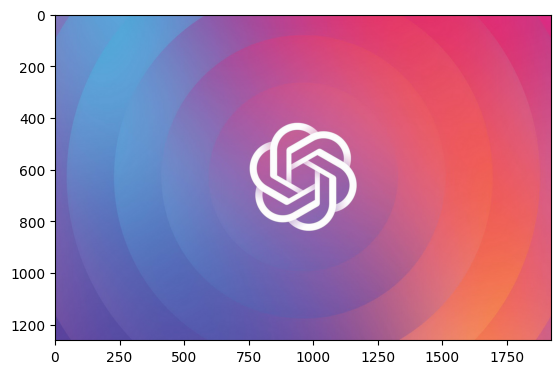

In [6]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [19]:
arr_px = image.reshape(image.shape[0] * image.shape[1], 3)
arr_px = arr_px / 255.
arr_px

array([[0.50980392, 0.46666667, 0.7372549 ],
       [0.50980392, 0.46666667, 0.7372549 ],
       [0.50980392, 0.46666667, 0.7372549 ],
       ...,
       [0.79215686, 0.37647059, 0.5254902 ],
       [0.79215686, 0.37647059, 0.5254902 ],
       [0.79607843, 0.38039216, 0.52941176]])

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, max_iter=300, init="k-means++", random_state=1)
y_pred = km.fit_predict(arr_px)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
y_pred.shape

(2421120,)

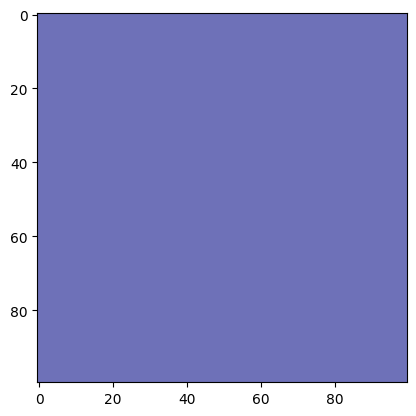

In [34]:
centers = km.cluster_centers_
center1 = np.repeat(centers[0].reshape(1, -1), 10000, axis=0).reshape(100, 100, 3)
plt.imshow(center1)

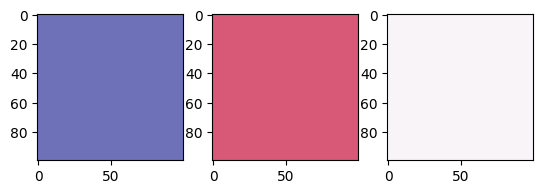

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, max_iter=300, init="k-means++", random_state=1)
y_pred = km.fit_predict(arr_px)

centers = km.cluster_centers_
for i, center in enumerate(centers):
    plt.subplot(1, len(centers), i+1)
    center = np.repeat(center.reshape(1, -1), 10000, axis=0).reshape(100, 100, 3)
    plt.imshow(center)

plt.show()



In [51]:
image.itemsize

1

In [55]:
new_image = y_pred.reshape(image.shape[0], image.shape[1]).astype(np.int8)
new_image

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int8)

In [56]:
centers

array([[0.43382141, 0.44483782, 0.72526143],
       [0.84993558, 0.34718006, 0.46888824],
       [0.97525967, 0.9577023 , 0.97555661]])

In [64]:
list(np.where(new_image==0)) + np.array()

[array([   0,    0,    0, ..., 1260, 1260, 1260], dtype=int64),
 array([   0,    1,    2, ..., 1229, 1230, 1231], dtype=int64)]

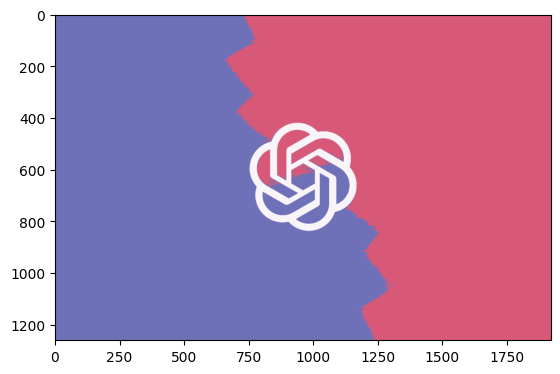

In [68]:
new_image_decoded = np.zeros((image.shape[0], image.shape[1], image.shape[2]))
new_image_decoded[new_image==0, :] = centers[0]
new_image_decoded[new_image==1, :] = centers[1]
new_image_decoded[new_image==2, :] = centers[2]
plt.imshow(new_image_decoded)

In [111]:
def compress_img(img_path, n_colors):
    image = imread(img_path)
    
    arr_px = image.reshape(-1, 3)
    arr_px = arr_px / arr_px.max()

    km_model = KMeans(n_clusters=n_colors, max_iter=10000, random_state=1)
    y_out = km_model.fit_predict(arr_px)
    # print(y_out.reshape(image.shape[0], -1))
    y_coded = y_out.reshape(image.shape[0], -1)
    decoder = km_model.cluster_centers_
    return y_coded, decoder

# plt.imshow()

y_coded, decoder = compress_img('patica.jpg', 15)


In [112]:
y_coded, decoder

(array([[ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        [ 9,  9,  9, ...,  9,  9,  9],
        ...,
        [ 2,  2,  2, ..., 12, 12, 12],
        [ 2,  2,  2, ..., 12, 12, 12],
        [ 2,  2,  2, ..., 12, 12, 12]]),
 array([[0.01908935, 0.00660356, 0.02001938],
        [0.81827281, 0.57588697, 0.56186299],
        [0.28340991, 0.17425385, 0.25607113],
        [0.98846698, 0.82242362, 0.79912109],
        [0.58248536, 0.37150053, 0.37185008],
        [0.99233364, 0.97334311, 0.97346706],
        [0.12522162, 0.84940347, 0.8295426 ],
        [0.13923181, 0.05532328, 0.15898618],
        [0.89630946, 0.01721407, 0.30180268],
        [0.2094237 , 0.02715409, 0.25231187],
        [0.92642746, 0.68676876, 0.66101296],
        [0.69171514, 0.46750913, 0.47028809],
        [0.44230815, 0.27588456, 0.30188744],
        [0.59123715, 0.02062978, 0.2719163 ],
        [0.13433261, 0.36807287, 0.33900358]]))

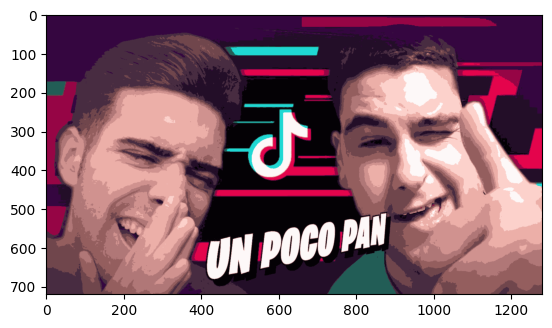

In [113]:
def decompress_img(encoded_img, decoder):
    new_image_decoded = np.zeros((encoded_img.shape[0], encoded_img.shape[1], 3))
    for class_ in range(len(decoder)):
        new_image_decoded[encoded_img==class_, :] = decoder[class_]
    
    return new_image_decoded

new_image_decoded = decompress_img(y_coded, decoder)

plt.imshow(new_image_decoded)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla